In [40]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [42]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [43]:
#to check missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

No Missing values in data

drop duplicate rows

In [46]:
df.duplicated().sum()

1

In [47]:
df.drop_duplicates(inplace=True)


In [48]:
# One hot encoding for fuel column
df = pd.get_dummies(data=df, columns=['Fuel_Type'], dtype=int)
df.head()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0


<Axes: >

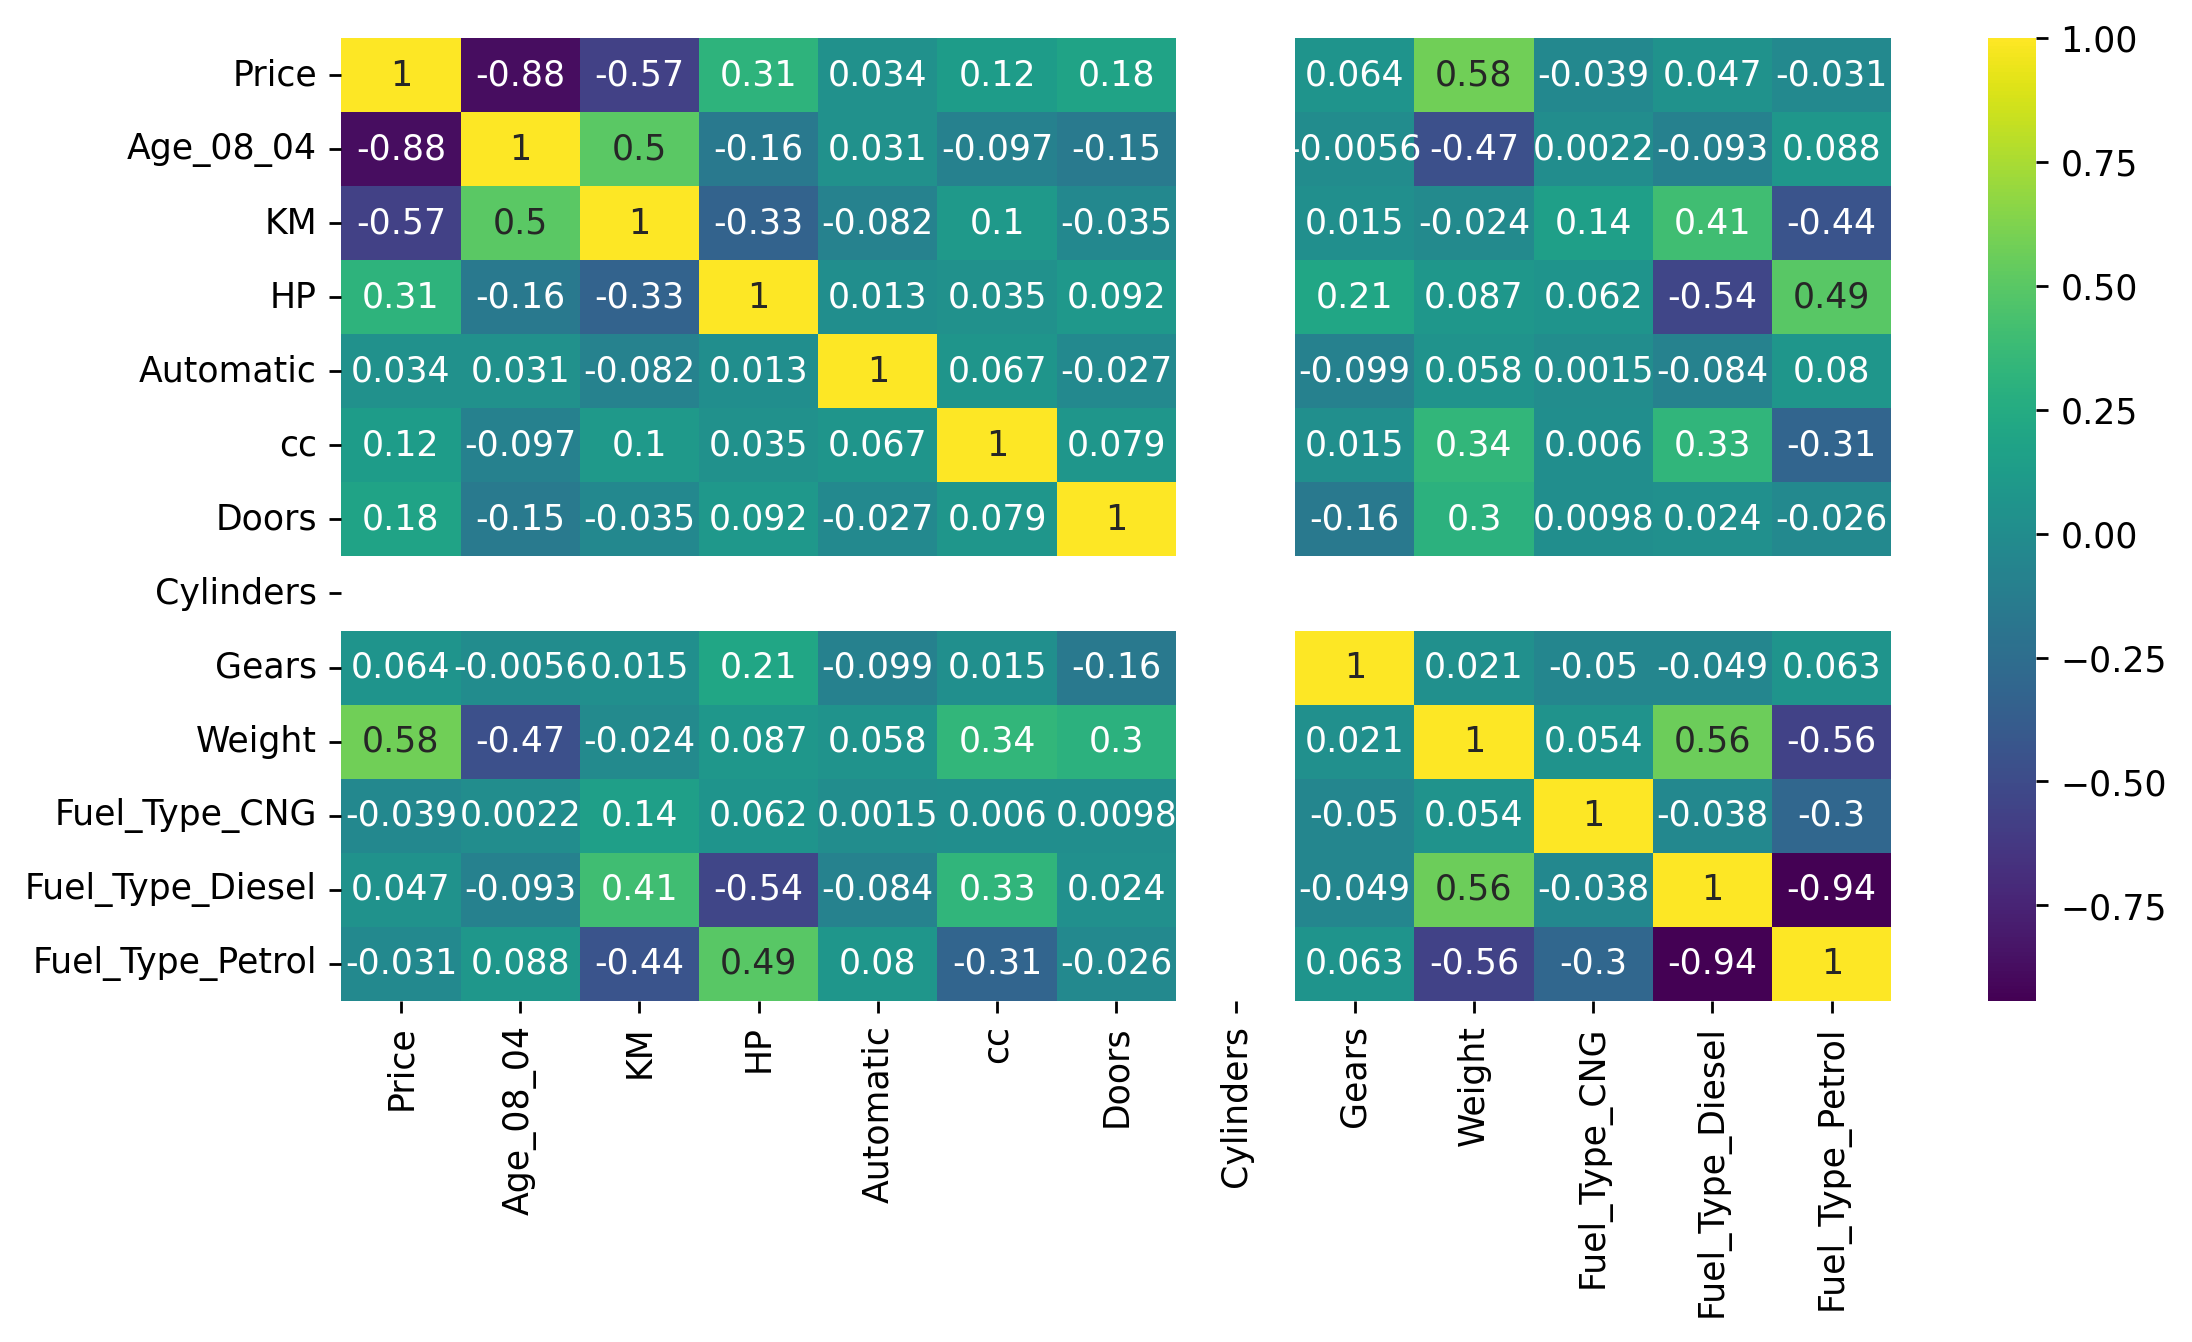

In [59]:
#heatmap to check correlation
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='viridis')


In [61]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [63]:
sc.fit_transform(df)

array([[ 0.77036821, -1.77726827, -0.57595832, ..., -0.109493  ,
         2.88412583, -2.71878886],
       [ 0.83966875, -1.77726827,  0.11647404, ..., -0.109493  ,
         2.88412583, -2.71878886],
       [ 0.89510918, -1.72337979, -0.71670745, ..., -0.109493  ,
         2.88412583, -2.71878886],
       ...,
       [-0.61564265,  0.80937864, -1.37562683, ..., -0.109493  ,
        -0.34672551,  0.36781083],
       [-0.96214536,  0.75549016, -1.37829506, ..., -0.109493  ,
        -0.34672551,  0.36781083],
       [-1.04530601,  1.07882103, -1.82962616, ..., -0.109493  ,
        -0.34672551,  0.36781083]])

In [69]:
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.770368,-1.777268,-0.575958,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,-0.109493,2.884126,-2.718789
1,0.839669,-1.777268,0.116474,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,-0.109493,2.884126,-2.718789
2,0.895109,-1.723380,-0.716707,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,-0.109493,2.884126,-2.718789
3,1.172311,-1.615603,-0.548902,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964,-0.109493,2.884126,-2.718789
4,0.839669,-1.400049,-0.802384,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.870688,-0.109493,2.884126,-2.718789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.892845,0.701602,-1.281492,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-0.905299,-0.109493,-0.346726,0.367811
1431,0.034396,0.863267,-1.322689,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1432,-0.615643,0.809379,-1.375627,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,-0.109493,-0.346726,0.367811
1433,-0.962145,0.755490,-1.378295,-1.034441,-0.242983,-0.651898,-1.084443,0.0,-0.140475,-1.096747,-0.109493,-0.346726,0.367811


Model building

In [86]:
#split data
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']
X_scaled=sc.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_train,X_test,y_train,y_test=train_test_split( X_scaled_df,y,test_size=0.2,random_state=42)


# Print shape of resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (1148, 12) (1148,)
Testing set: (287, 12) (287,)


Model 1 with all features

In [89]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

coef_df1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model1.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Model 1: All Features Coefficients")
print(coef_df1)


Model 1: All Features Coefficients
             Feature   Coefficient
0          Age_08_04 -6.236026e-01
8             Weight  3.816914e-01
1                 KM -1.661942e-01
11  Fuel_Type_Petrol  6.708006e-02
2                 HP  6.673608e-02
10  Fuel_Type_Diesel -6.620999e-02
7              Gears  2.377671e-02
5              Doors -2.325670e-02
3          Automatic  1.709718e-02
9      Fuel_Type_CNG -1.145723e-02
4                 cc -5.540083e-03
6          Cylinders  5.551115e-17


Model 2 with features Age_08_04, KM, HP, Weight, cc

In [92]:
top_features = ['Age_08_04', 'KM', 'HP', 'Weight', 'cc']

model2 = LinearRegression()
model2.fit(X_train[top_features], y_train)


coef_df2 = pd.DataFrame({
    'Feature': top_features,
    'Coefficient': model2.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nModel 2: Top Correlated Features Coefficients")
print(coef_df2)



Model 2: Top Correlated Features Coefficients
     Feature  Coefficient
0  Age_08_04    -0.620111
3     Weight     0.292805
1         KM    -0.207021
2         HP     0.131378
4         cc    -0.014075


Model 3 — Remove Multicollinearity

In [95]:
reduced_features = ['Age_08_04', 'KM', 'HP', 'Weight']

model3 = LinearRegression()
model3.fit(X_train[reduced_features], y_train)

coef_df3 = pd.DataFrame({
    'Feature': reduced_features,
    'Coefficient': model3.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nModel 3: Reduced Features Coefficients")
print(coef_df3)



Model 3: Reduced Features Coefficients
     Feature  Coefficient
0  Age_08_04    -0.620464
3     Weight     0.287385
1         KM    -0.208545
2         HP     0.130681


In [97]:
#in the above 3 model if 1] it is positive coeffiecient then it increases as the feature increases 2] it is negative coefficient thewn it incvreases as the feature decreases

Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [102]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X_test, y_test, name):
    y_pred=model.predict(X_test)
    r2=r2_score(y_test, y_pred)
    mae=mean_absolute_error(y_test, y_pred)
    mse=mean_squared_error(y_test, y_pred)
    rmse =np.sqrt(mse)
    
    print(f"\n{name} Evaluation:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    return r2, mae, mse, rmse

# Evaluate all models
evaluate_model(model1,X_test,y_test, "Model 1-All Features")
evaluate_model(model2,X_test[top_features], y_test,"Model 2 - Top Correlated Features")
evaluate_model(model3, X_test[reduced_features],y_test,"Model 3 - Reduced Multicollinearity")



Model 1-All Features Evaluation:
R² Score: 0.8203
MAE: 0.27
MSE: 0.17
RMSE: 0.41

Model 2 - Top Correlated Features Evaluation:
R² Score: 0.8381
MAE: 0.27
MSE: 0.15
RMSE: 0.39

Model 3 - Reduced Multicollinearity Evaluation:
R² Score: 0.8388
MAE: 0.27
MSE: 0.15
RMSE: 0.39


(0.8387549179514013,
 0.2736609913204832,
 0.14864737077140389,
 0.38554814326022097)

In [104]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

ridge=Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)
ridge_pred=ridge.predict(X_test)
ridge_r2=r2_score(y_test, ridge_pred)
ridge_rmse=np.sqrt(mean_squared_error(y_test, ridge_pred))

lasso =Lasso(alpha=0.01)  
lasso.fit(X_train, y_train)
lasso_pred=lasso.predict(X_test)
lasso_r2 =r2_score(y_test, lasso_pred)
lasso_rmse= np.sqrt(mean_squared_error(y_test, lasso_pred))

print("Ridge Regression:")
print(f"R² Score:{ridge_r2:.4f},RMSE:{ridge_rmse:.2f}")

print("\n Lasso Regression:")
print(f"R² Score:{lasso_r2:.4f},RMSE:{lasso_rmse:.2f}")


Ridge Regression:
R² Score:0.8206,RMSE:0.41

 Lasso Regression:
R² Score:0.8323,RMSE:0.39
